### Action Required: Upload `train.csv`

The `FileNotFoundError` indicates that the `train.csv` dataset is missing from the Colab environment. Please run the following cell to upload the file. Once uploaded, you can re-run the cells that depend on this file (e.g., the cell to load the DataFrame and the visualization cell).

In [ ]:
from google.colab import files
import os

# Check if the file already exists to avoid re-uploading
if not os.path.exists('/content/train.csv'):
    print("Uploading 'train.csv'...")
    uploaded = files.upload()
    for fn in uploaded.keys():
        print(f'User uploaded file "{fn}"')
        # If the uploaded file is not named train.csv, rename it
        if fn != 'train.csv':
            os.rename(fn, 'train.csv')
            print(f'Renamed "{fn}" to "train.csv"')
else:
    print("'train.csv' already exists in /content/.")

# Verify if the file is now present
if os.path.exists('/content/train.csv'):
    print("'train.csv' is now available at /content/train.csv.")
    print("You can now re-run the cells that load and analyze the data.")
else:
    print("Failed to ensure 'train.csv' is present. Please try again or manually upload.")

'train.csv' already exists in /content/.
'train.csv' is now available at /content/train.csv.
You can now re-run the cells that load and analyze the data.


### Subtask:
Visualize the calculated survival counts using a bar chart.

**Reasoning**:
To visualize the survival counts, I will convert the `survival_counts` Series into a DataFrame and use `seaborn.barplot` to create a bar chart. This will provide a clear visual comparison of the number of survivors and non-survivors.

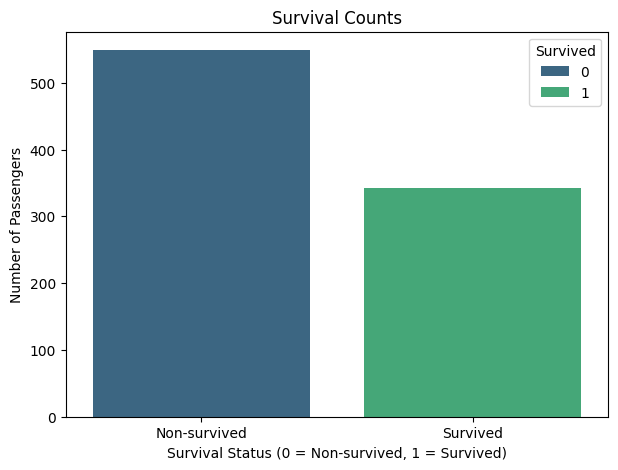

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the DataFrame if not already present (to ensure 'df' is defined)
df = pd.read_csv('/content/train.csv')

# Calculate survival_counts if not already present
survival_counts = df['Survived'].value_counts()

# Convert the Series to a DataFrame for better seaborn integration
survival_counts_df = survival_counts.reset_index()
survival_counts_df.columns = ['Survived', 'Count']

plt.figure(figsize=(7, 5))
sns.barplot(x='Survived', y='Count', hue='Survived', data=survival_counts_df, palette='viridis', legend='full')
plt.title('Survival Counts')
plt.xlabel('Survival Status (0 = Non-survived, 1 = Survived)')
plt.ylabel('Number of Passengers')
plt.xticks(ticks=[0, 1], labels=['Non-survived', 'Survived'])
plt.show()

# Task
Perform an initial exploratory data analysis on the Titanic dataset, focusing on survival counts and missing value patterns. Load the `train.csv` dataset, calculate and display the counts of survivors and non-survivors, and generate a heatmap to visualize missing values. Summarize the findings from both the survival counts and the missing values heatmap, noting any significant observations or columns with extensive missing data.

## Load Titanic Dataset

### Subtask:
Load the 'train.csv' dataset into a pandas DataFrame for analysis.


**Reasoning**:
The subtask requires loading the 'train.csv' dataset. I need to import the pandas library first and then use its read_csv function to load the data into a DataFrame named 'df'.



In [ ]:
import pandas as pd

df = pd.read_csv('/content/train.csv')
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


## Calculate Survival Count

### Subtask:
Calculate and display the count of survivors and non-survivors from the 'Survived' column.


**Reasoning**:
To calculate the count of survivors and non-survivors, I will use the `.value_counts()` method on the 'Survived' column of the `df` DataFrame and then print the result.



In [ ]:
survival_counts = df['Survived'].value_counts()
print(survival_counts)

Survived
0    549
1    342
Name: count, dtype: int64


## Generate Missing Values Heatmap

### Subtask:
Generate a heatmap to visualize the distribution of missing values across all columns in the dataset. This will help identify columns with significant missing data. Ensure the heatmap includes a legend.


**Reasoning**:
To visualize the missing values, I will import the `seaborn` and `matplotlib.pyplot` libraries, then create a heatmap using `seaborn.heatmap` on `df.isnull()` to show the distribution of missing data.



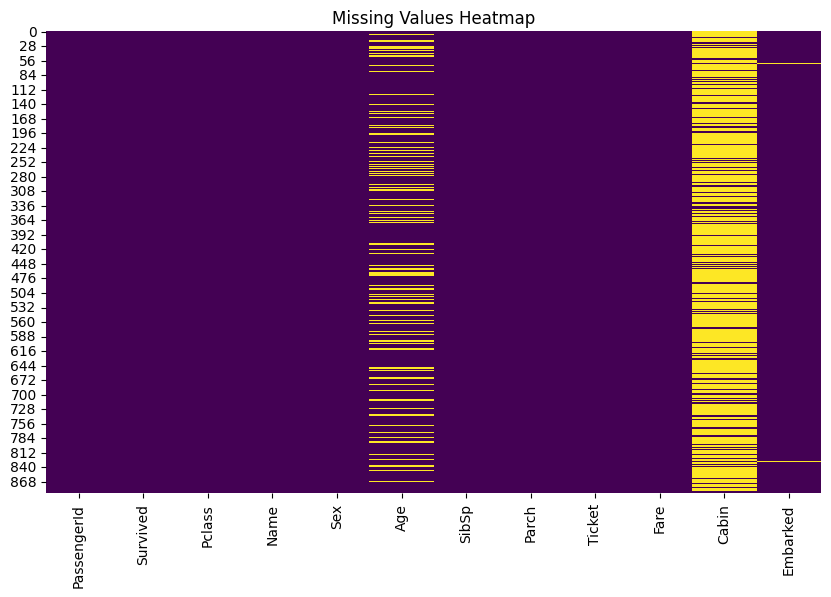

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


**Reasoning**:
The previous heatmap was generated without a color bar (`cbar=False`), which means it didn't explicitly include a legend as requested in the subtask. To address this, I will regenerate the heatmap with `cbar=True` to display a color bar that serves as a legend for the missing values. I will also make sure the title is clearly set.



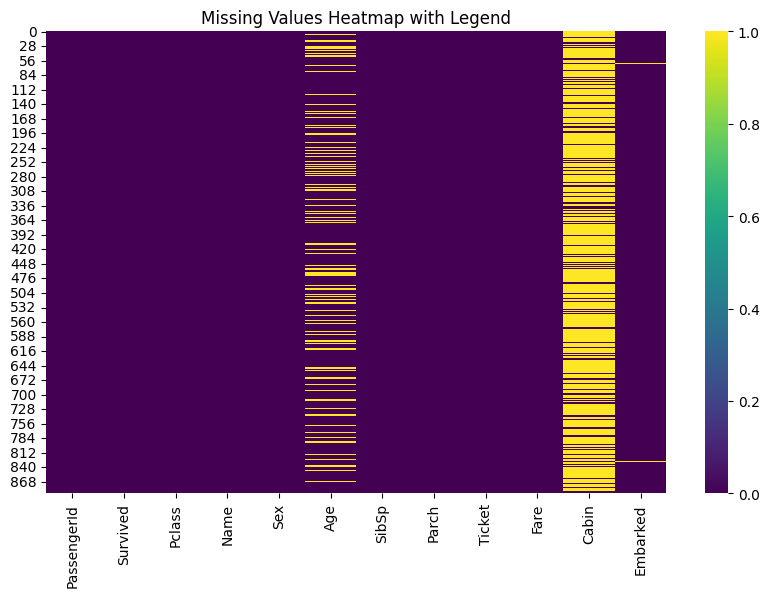

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.title('Missing Values Heatmap with Legend')
plt.show()

### Summary of Findings

**Survival Counts:**

The `survival_counts` analysis revealed the following distribution:
- **0 (Non-survivors):** 549 passengers
- **1 (Survivors):** 342 passengers

This indicates that a significantly larger number of passengers (549) did not survive compared to those who did (342) in the training dataset. This imbalance is an important factor to consider for any predictive modeling.

**Missing Values Heatmap:**

The heatmap of missing values clearly visualizes the data completeness across the dataset. Key observations include:
- **Age:** This column shows a noticeable amount of missing data. The heatmap indicates a scattered pattern of missing values, suggesting that imputation or careful handling of these missing values will be necessary.
- **Cabin:** This column has a very high proportion of missing values, appearing almost entirely missing across the dataset. This suggests that the 'Cabin' column might not be suitable for direct use without extensive feature engineering or might need to be dropped if imputation is not feasible or effective.
- **Embarked:** A very small number of missing values are present in this column, which are likely easy to handle through simple imputation strategies.
- **Other Columns:** Most other columns (`PassengerId`, `Survived`, `Pclass`, `Name`, `Sex`, `SibSp`, `Parch`, `Ticket`, `Fare`) appear to be complete with no missing values, as indicated by their uniform color on the heatmap.

## Summary:

### Q&A

1.  **How many survivors and non-survivors are in the dataset?**
    There are 342 survivors and 549 non-survivors in the dataset.
2.  **Which columns have significant missing values?**
    The 'Age' column has a noticeable amount of missing data. The 'Cabin' column has a very high proportion of missing values, indicating almost complete missingness. The 'Embarked' column has a very small number of missing values. Most other columns appear to be complete.

### Data Analysis Key Findings

*   **Survival Distribution:** The dataset contains more non-survivors (549 passengers) than survivors (342 passengers), indicating an imbalance in the survival outcome.
*   **Missing Data in 'Cabin' Column:** The 'Cabin' column exhibits an extremely high proportion of missing values, suggesting it might be largely unusable without significant feature engineering or may need to be dropped.
*   **Missing Data in 'Age' Column:** The 'Age' column has a considerable amount of missing data, requiring careful handling through imputation or other strategies.
*   **Missing Data in 'Embarked' Column:** Only a very small number of missing values are present in the 'Embarked' column, which should be relatively easy to address.
*   **Complete Columns:** Columns such as 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', and 'Fare' appear to be complete with no missing values.

### Insights or Next Steps

*   Address the imbalanced 'Survived' target variable in subsequent modeling to prevent bias towards the majority class.
*   Develop strategies for handling missing data, specifically focusing on imputing the 'Age' column and carefully considering whether to impute, engineer, or drop the 'Cabin' column due to its extensive missingness.


# Task
Analyze survival rates by gender: calculate the proportion of survivors for each gender, and then visualize these rates using a bar chart with a legend to illustrate the difference in survival between males and females.

## Analyze Survival by Gender

### Subtask:
Calculate the proportion of survivors for each gender and visualize these rates using a bar chart with a legend.


**Reasoning**:
First, I will calculate the survival rate for each gender by grouping the DataFrame by 'Sex' and taking the mean of the 'Survived' column. Then, I will use a markdown block to explain the code.



In [ ]:
survival_by_gender = df.groupby('Sex')['Survived'].mean()
print(survival_by_gender)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


**Reasoning**:
I need to visualize the calculated survival rates for each gender using a bar chart, ensuring it includes a title, axis labels, and a legend, as specified in the subtask instructions.



/tmp/ipython-input-782120117.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_gender.index, y=survival_by_gender.values, palette='viridis')


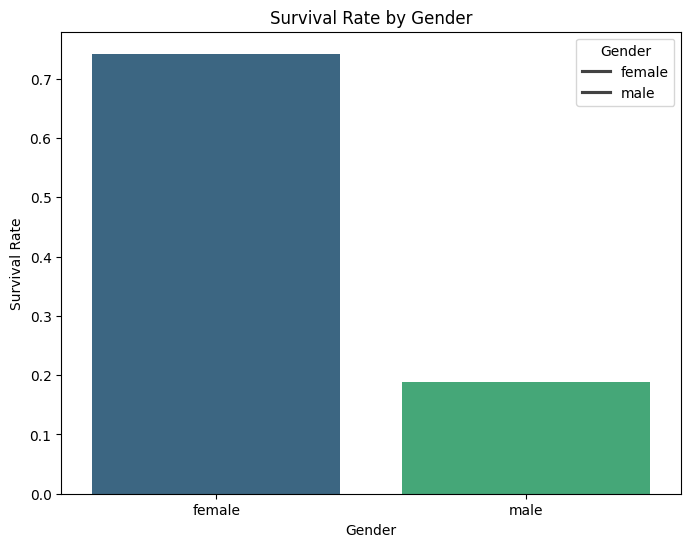

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=survival_by_gender.index, y=survival_by_gender.values, palette='viridis')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.legend(title='Gender', labels=survival_by_gender.index)
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` because `palette` was used without assigning a `hue` variable in `sns.barplot`. To address this and ensure a proper legend is generated automatically by seaborn, I will convert the `survival_by_gender` Series into a DataFrame, explicitly use 'Gender' for `x` and `hue` parameters, and let `seaborn` handle the legend.



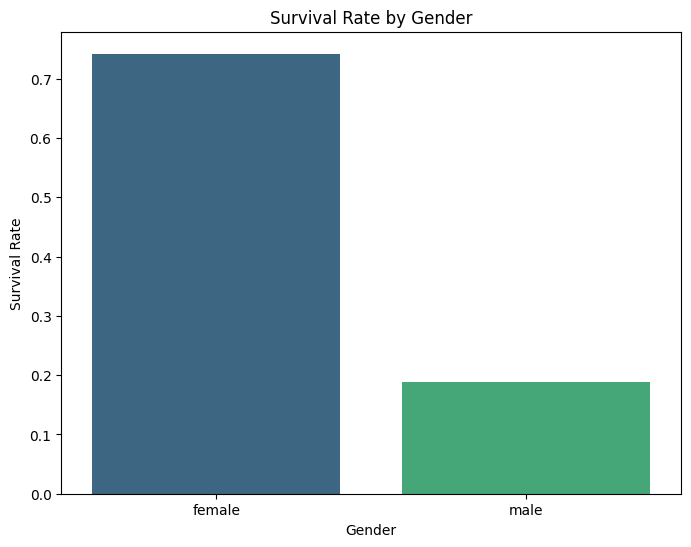

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the Series to a DataFrame for better seaborn integration
survival_by_gender_df = survival_by_gender.reset_index()
survival_by_gender_df.columns = ['Gender', 'SurvivalRate']

plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='SurvivalRate', hue='Gender', data=survival_by_gender_df, palette='viridis')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

## Analyze Survival by Class

### Subtask:
Calculate the survival rates grouped by passenger class and visualize them using a bar chart with a legend.


**Reasoning**:
To analyze survival rates by passenger class, I will group the DataFrame by 'Pclass' and calculate the mean of the 'Survived' column to get the survival rate for each class, then print the result.



In [ ]:
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print(survival_by_class)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


**Reasoning**:
To visualize the survival rates by passenger class, I need to convert the `survival_by_class` Series into a DataFrame. This will facilitate the use of `seaborn.barplot` with a `hue` parameter for automatic legend generation, and then plot the bar chart with appropriate labels and title.



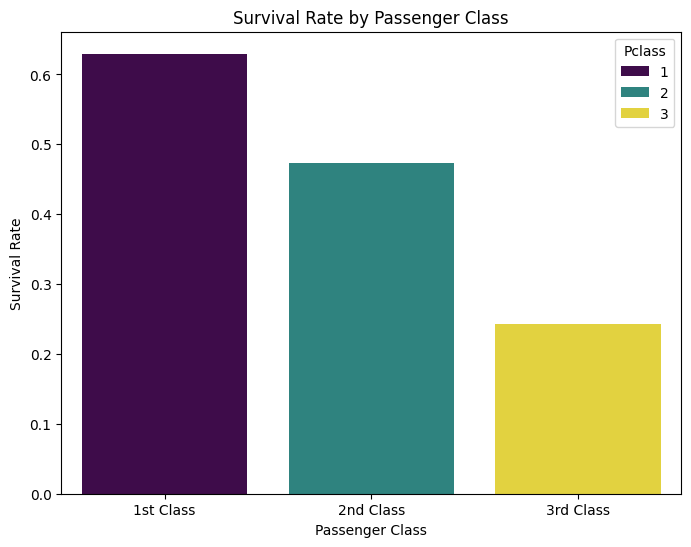

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the Series to a DataFrame for better seaborn integration
survival_by_class_df = survival_by_class.reset_index()
survival_by_class_df.columns = ['Pclass', 'SurvivalRate']

plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='SurvivalRate', hue='Pclass', data=survival_by_class_df, palette='viridis', legend='full')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1, 2], labels=['1st Class', '2nd Class', '3rd Class'])
plt.show()

## Generate Correlation Heatmap

### Subtask:
Compute the correlation matrix for numerical features in the dataset and display it as a heatmap with a legend to identify relationships between variables.


**Reasoning**:
To compute and visualize the correlation matrix, I will first select the numerical columns from the DataFrame, calculate their correlation, and then generate a heatmap using seaborn, ensuring a legend and annotations are included as per the instructions.



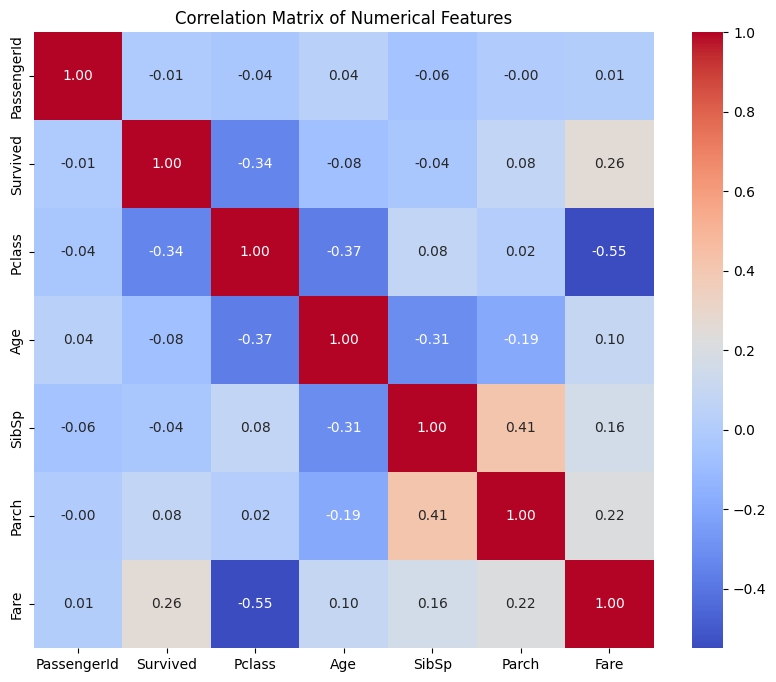

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Analyze Age Distribution

### Subtask:
Plot the distribution of the 'Age' column using a histogram or KDE plot to understand the age demographics of passengers.


**Reasoning**:
To visualize the age distribution, I will use `seaborn.histplot` with `kde=True` on the 'Age' column, which will show both the histogram and the Kernel Density Estimate, and include appropriate labels and title.



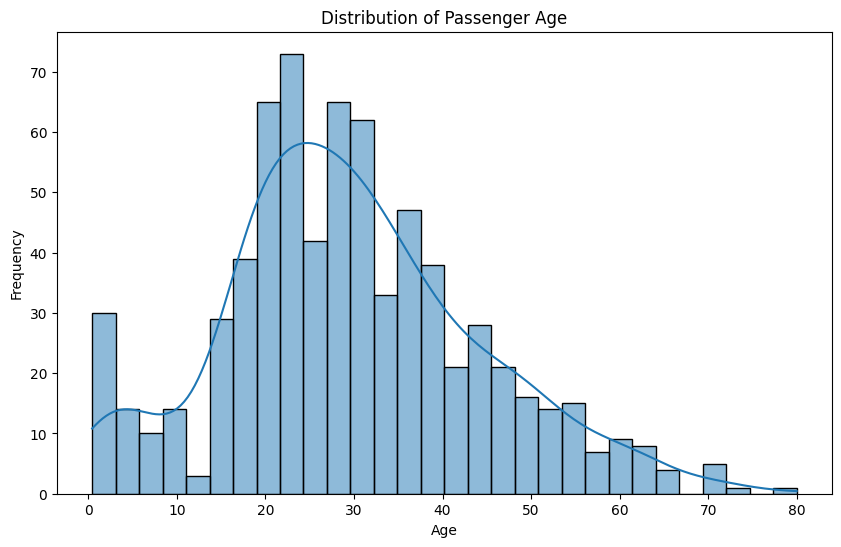

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title('Distribution of Passenger Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Analyze Fare Distribution

### Subtask:
Plot the distribution of the 'Fare' column using a histogram or KDE plot to understand the fare price distribution.


**Reasoning**:
To visualize the fare distribution, I will use `seaborn.histplot` with `kde=True` on the 'Fare' column, ensuring that any missing values are dropped. I will also set appropriate titles and labels for the plot as specified in the instructions.



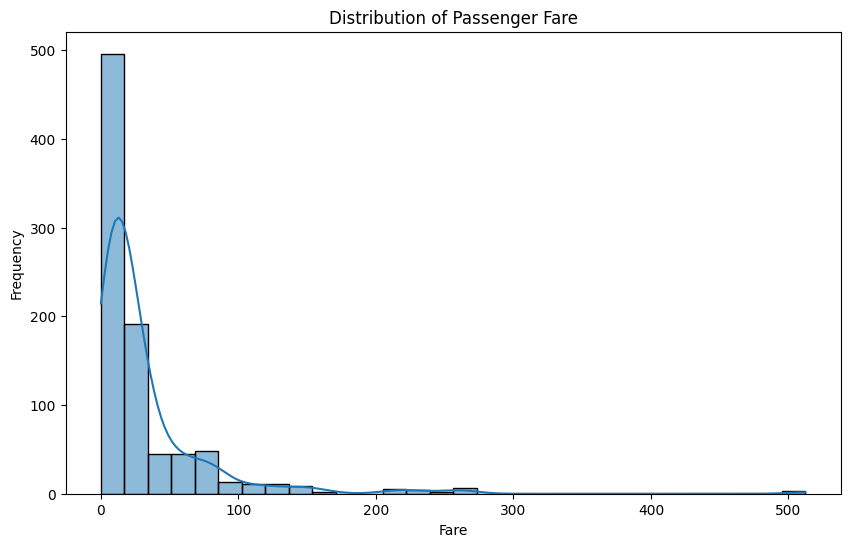

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'].dropna(), kde=True, bins=30)
plt.title('Distribution of Passenger Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

## Analyze Parch/Family Size Distribution

### Subtask:
Analyze the distribution of the 'Parch' (parents/children aboard) column, possibly creating a 'FamilySize' feature (SibSp + Parch + 1) and visualizing its distribution to understand family structures.


**Reasoning**:
To analyze family structures, I will create a new column 'FamilySize' by adding 'SibSp', 'Parch', and 1 to the existing DataFrame.



In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
print(df[['SibSp', 'Parch', 'FamilySize']].head())

   SibSp  Parch  FamilySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0           1


**Reasoning**:
Now that the 'FamilySize' column has been created, I will visualize its distribution using a histogram with a Kernel Density Estimate (KDE) plot to understand the passenger family structures.



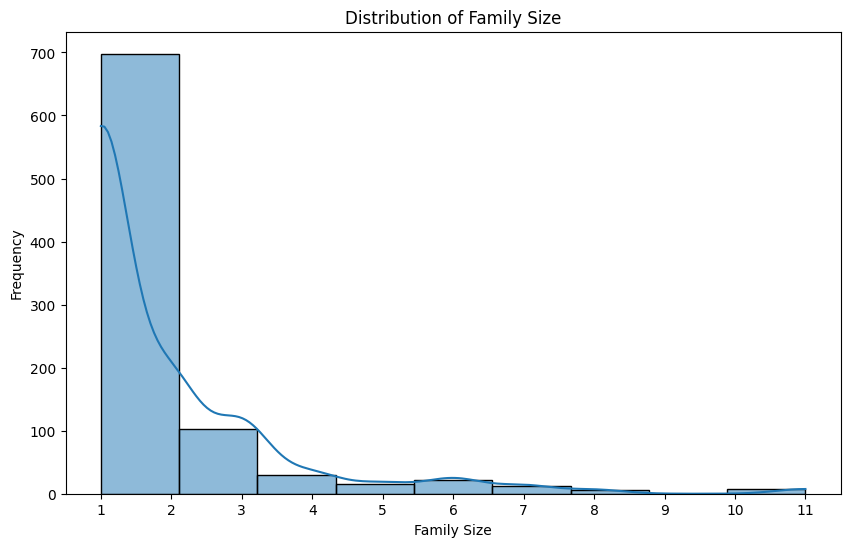

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['FamilySize'], kde=True, bins=df['FamilySize'].nunique())
plt.title('Distribution of Family Size')
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.xticks(range(1, df['FamilySize'].max() + 1))
plt.show()

## Analyze Survival by Embarked Port

### Subtask:
Calculate the survival rates grouped by 'Embarked' port and visualize the results using a bar chart with a legend.


**Reasoning**:
First, I need to calculate the mean survival rate for each 'Embarked' port by grouping the DataFrame by 'Embarked' and taking the mean of the 'Survived' column. I will also fill any missing 'Embarked' values with the most frequent one before calculating the survival rates to avoid issues with null values in the grouping.



In [ ]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
survival_by_embarked = df.groupby('Embarked')['Survived'].mean()
print(survival_by_embarked)

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


/tmp/ipython-input-4186054623.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


**Reasoning**:
The previous code generated a `FutureWarning` regarding `inplace=True`. I will fix this by assigning the result of `fillna` back to the 'Embarked' column directly. Then, I will convert the `survival_by_embarked` Series into a DataFrame and visualize it with a bar chart, ensuring a legend is included as per the instructions.



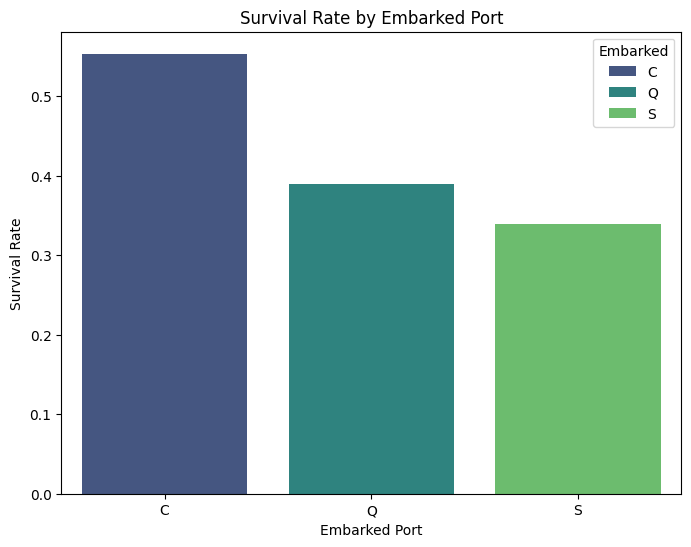

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
survival_by_embarked = df.groupby('Embarked')['Survived'].mean()

# Convert the Series to a DataFrame for better seaborn integration
survival_by_embarked_df = survival_by_embarked.reset_index()
survival_by_embarked_df.columns = ['Embarked', 'SurvivalRate']

plt.figure(figsize=(8, 6))
sns.barplot(x='Embarked', y='SurvivalRate', hue='Embarked', data=survival_by_embarked_df, palette='viridis', legend='full')
plt.title('Survival Rate by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Survival Rate')
plt.show()